## Comprehensive Pipeline

To build a predictive model, the following pipeline will be used:

1. **Understanding the dataset**
    - Understanding the size of the dataset
    - *_Task:_* Predict used car prices
    - Undererstanding of key features
    - Data Source: [An aggregation of the top 4 most popular Kaggle datasets related to used car price prediction in India](https://www.kaggle.com/datasets/satvshr/top-4-used-car-sales-datasets-combined)

2. **Data Preprocessing**

    a. *_Loading the Data._*
    
        - Load the dataset into a DataFrame using pandas.
        - Inspect the dataset using functions like df.head(), df.info(), and df.describe() to get an overview of the structure.
        
    b. *_Handling Missing Data:_*

        - Identify missing values using df.isnull().sum().
        - Handle missing data by:
            - Dropping columns/rows with too many missing values.
            - Imputing with mean, median, or mode (for numerical/categorical features).
    
    c. *_Data Type Conversion:_*

        - Ensure that data types are correct for each feature (e.g., Year should be numerical, Fuel Type should be categorical).
    
3. **Exploratory Data Analysis (EDA)**

    a. *_Univariate Analysis:_*
    
        - Categorical Variables (e.g., Fuel Type, Transmission, Seller Type):
            - Use bar charts to visualize distributions. Check for dominance in certain categories.

        - Numerical Variables (e.g., Year, Mileage, Price):
            - Visualize using histograms and boxplots. Understand the spread, skewness, and distribution of variables like car price and mileage.

    b. *_Bivariate Analysis:_*

        - Price vs Categorical Variables:
            - Plot boxplots or violin plots for price vs categorical features like fuel type, transmission, etc., to identify relationships between these features and price.
        - Price vs Numerical Variables:
            - Plot scatterplots and compute correlation coefficients between price and numerical features like year of manufacture, mileage, etc.
            - Use heatmaps to visualize the correlation matrix and detect multicollinearity between features.

    c. *_Insights & Feature Relationships:_*

        - Detect key factors that affect the target (car price), such as the year, mileage, fuel type, or brand.


4. **Feature Engineering**

    a. *_Encoding Categorical Variables:_* 
    
        - Use either "label Encoding" or One-Hot Encoding"
    
    b. *_Feature Transformation:_*

        - Scaling: Normalize or standardize numerical features (e.g., mileage, year) using StandardScaler or MinMaxScaler.

    c. *_Creating New Features:_*

        - Car Age: Derive Car Age as 2024 - Year_of_Manufacture. Older cars are likely to have a lower price.
        - Mileage per Year: Create a feature that divides total mileage by the car’s age, giving a sense of how heavily the car has been used.
        - Fuel Efficiency Categories: Use bins to categorize cars based on their mileage (e.g., Low, Medium, High).

    d. *_Feature Selection:_*

        - Use techniques like Recursive Feature Elimination (RFE) or tree-based feature importance scores to select the most impactful features.

5. **Model Selection**

    a. *_Baseline Models:_*
    
        - Start with basic models like Linear Regression and Decision Trees to create a benchmark.
        - Linear models will give insights into the relationship between price and features, while tree-based models handle non-linear relationships well.

    b. *_Advanced Models:_*

        - Random Forest: A strong ensemble model for tabular data that can capture complex relationships between features and target.
        - Gradient Boosting (XGBoost/LightGBM): These are powerful models that perform well with structured data and can capture feature interactions effectively.
        - Support Vector Machines (SVM): Useful if the data is high-dimensional and non-linear (though it may require feature scaling).
    
    c. *_Model Training:_*

        - Split the data into training and testing sets using train_test_split (typically 80/20).
        - Apply cross-validation (K-Fold, e.g., 5-fold) to ensure robustness and prevent overfitting.


6. **Model Evaluation**
    
    *_a. Evaluation Metrics:_*

        - RMSE (Root Mean Squared Error): Measures the average magnitude of the error in the predictions. Lower is better.
        - MAE (Mean Absolute Error): Another good metric for evaluating the average error in predicting car prices.
        - R² (Coefficient of Determination): Measures how well the model explains the variance in car prices.

    b. *_Comparison of Models:_*

        - Compare models based on the evaluation metrics (RMSE, MAE, R²) across cross-validation folds and test data.
        - Check for overfitting by comparing performance on the training set vs the test set.

    

7. **Final Model and Deployment**
    
    a. *_Model Saving:_*

        - Once the best model is chosen, save it using pickle or joblib for future use in a real-time application.

    b. *_Deployment:_*

        - Deploy the model as a REST API using Flask or FastAPI, or integrate it into a web app where users can input car features to get price predictions.



## Data Preprocessing

#### Loading the data

In [1]:
# Loading necessary models for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load data into a dataframe
df = pd.read_csv('UsedCarSalesDataset.csv')
df.head()

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,32199,35,maruti,10561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,32199,301,swift,1863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,32200,2,manual,24904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,32199.0,NaN,NaN,NaN,7.120625,3.485577,0.0,4.0,7.0,9.0,29.0
fuel,32200,5,petrol,19155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,24068.0,NaN,NaN,NaN,1489.872569,520.916872,72.0,1197.0,1248.0,1591.0,5998.0
km,32200.0,NaN,NaN,NaN,54952.690311,55771.453615,0.0,30208.25,50000.0,71020.75,6500000.0
owner,16819.0,NaN,NaN,NaN,1.263452,0.490463,1.0,1.0,1.0,1.0,4.0
price,32200.0,NaN,NaN,NaN,734700.123447,703770.177962,40000.0,385000.0,551000.0,792000.0,7066000.0
location,13801,26,maharashtra,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   km            32200 non-null  float64
 7   owner         16819 non-null  float64
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(8), object(6)
memory usage: 3.4+ MB


#### Data Type Conversions

In [5]:
# Convert 'engine', 'owner', and 'seats' to categorical types
df['engine'] = df['engine'].astype('object')
df['owner'] = df['owner'].astype('object')
df['seats'] = df['seats'].astype('object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  object 
 6   km            32200 non-null  float64
 7   owner         16819 non-null  object 
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  object 
 13  type          8015 non-null   object 
dtypes: float64(5), object(9)
memory usage: 3.4+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,32199,35,maruti,10561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,32199,301,swift,1863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,32200,2,manual,24904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,32199.0,NaN,NaN,NaN,7.120625,3.485577,0.0,4.0,7.0,9.0,29.0
fuel,32200,5,petrol,19155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,24068.0,156.0,1197.0,3845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
km,32200.0,NaN,NaN,NaN,54952.690311,55771.453615,0.0,30208.25,50000.0,71020.75,6500000.0
owner,16819.0,4.0,1.0,12769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,32200.0,NaN,NaN,NaN,734700.123447,703770.177962,40000.0,385000.0,551000.0,792000.0,7066000.0
location,13801,26,maharashtra,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Handling Missing Data

In [8]:
# Checking missing values
df.isna().sum()

brand               1
model               1
transmission        0
age                 1
fuel                0
engine           8132
km                  0
owner           15381
price               0
location        18399
mileage         10820
power           10927
seats            2847
type            24185
dtype: int64

In [9]:
# Shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns \n")

# Calculate null percentage of each feature
feat_percentage = round((df.isna().sum()/df.shape[0])*100,2)
print('Null values in percentage (%)\n')
print(feat_percentage)

The dataset has 32200 rows and 14 columns 

Null values in percentage (%)

brand            0.00
model            0.00
transmission     0.00
age              0.00
fuel             0.00
engine          25.25
km               0.00
owner           47.77
price            0.00
location        57.14
mileage         33.60
power           33.93
seats            8.84
type            75.11
dtype: float64


In [10]:
# Features with missing values of above 50% should be dropped
# Others can be imputed with either mean, mode, or median

# Drop 'location' and 'type' columns having 57.14% and 75.11% missing values respectively
df = df.drop(['location', 'type'], axis=1)

In [11]:
# Impute 'engine', 'owner', and 'seats' columns with mode
df['engine'] = df['engine'].fillna(df['engine'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

# Impute 'power' and 'mileage' columns with mean
df['power'] = df['power'].fillna(df['power'].mean())
df['mileage'] = df['mileage'].fillna(df['mileage'].mean())

# Drop row with null value
df = df.dropna()

# Recheck null values
df.isna().sum()

C:\Users\ekirush\AppData\Local\Temp\ipykernel_676\2509456300.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['engine'] = df['engine'].fillna(df['engine'].mode()[0])
C:\Users\ekirush\AppData\Local\Temp\ipykernel_676\2509456300.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owner'] = df['owner'].fillna(df['owner'].mode()[0])


C:\Users\ekirush\AppData\Local\Temp\ipykernel_676\2509456300.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['seats'] = df['seats'].fillna(df['seats'].mode()[0])


brand           0
model           0
transmission    0
age             0
fuel            0
engine          0
km              0
owner           0
price           0
mileage         0
power           0
seats           0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Univariate Analysis

*_Categrical Variables_*

In [12]:
# Defining categorical and numerical columns

#Categorical Columns
cat_columns = df.select_dtypes(include=['category', 'object']).columns
print("Categorical Columns:", cat_columns)

#Numerical Columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
print('\nNumerical Columns:',num_columns)

Categorical Columns: Index(['brand', 'model', 'transmission', 'fuel'], dtype='object')

Numerical Columns: Index(['age', 'engine', 'km', 'owner', 'price', 'mileage', 'power', 'seats'], dtype='object')


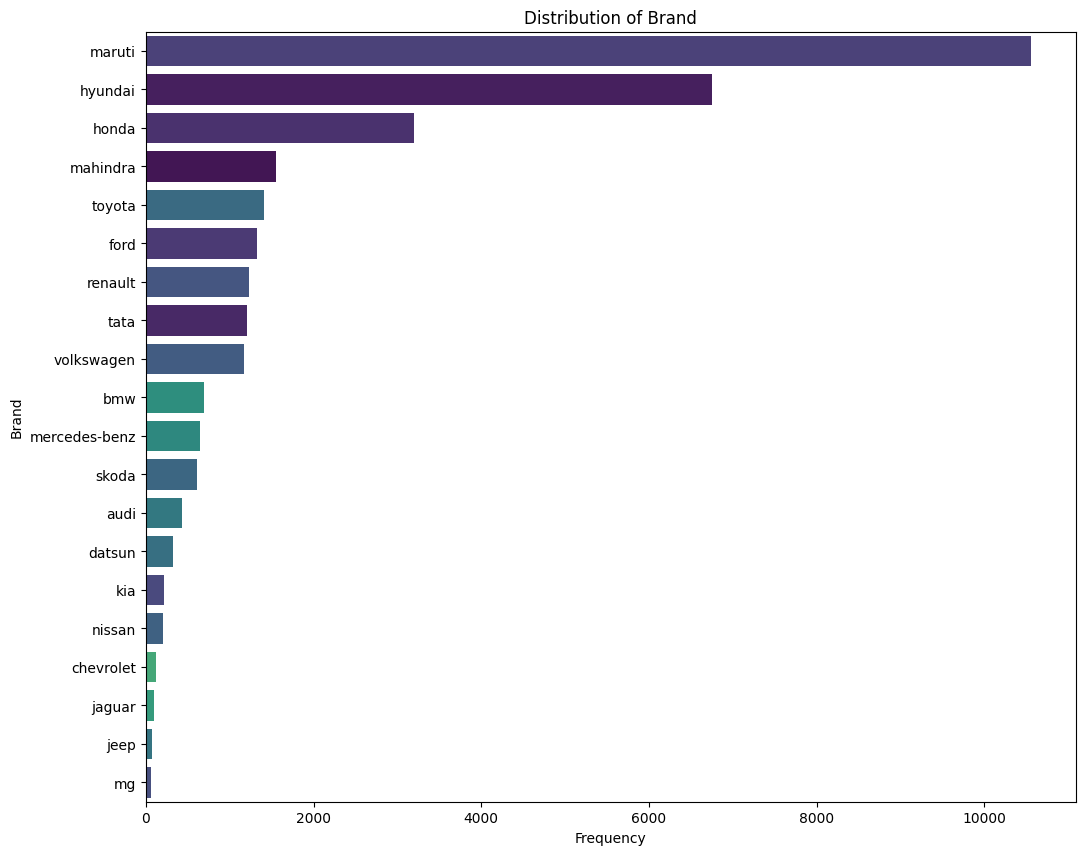

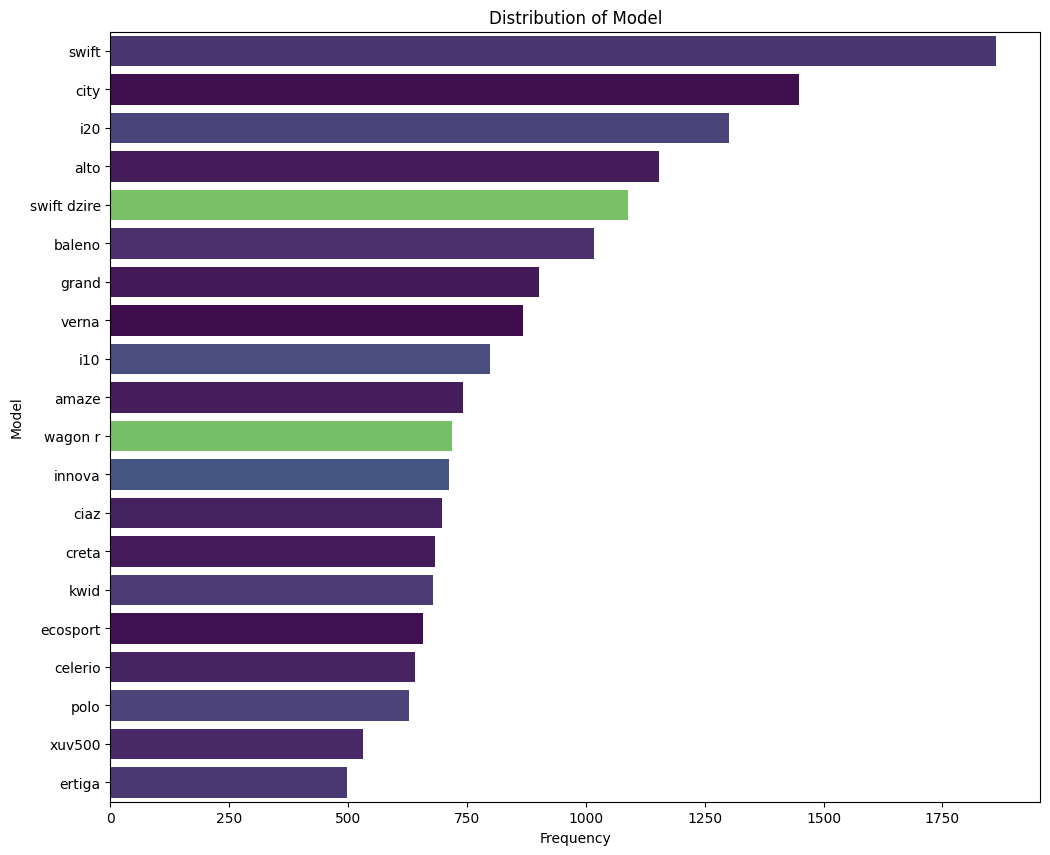

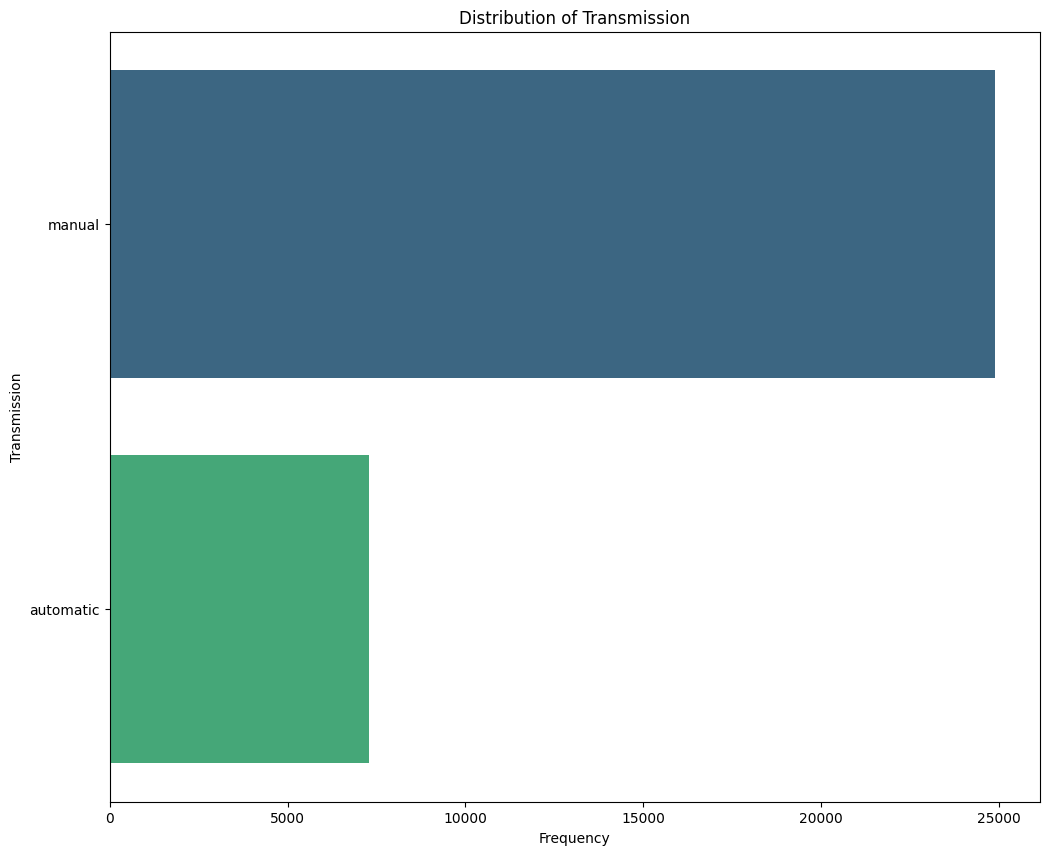

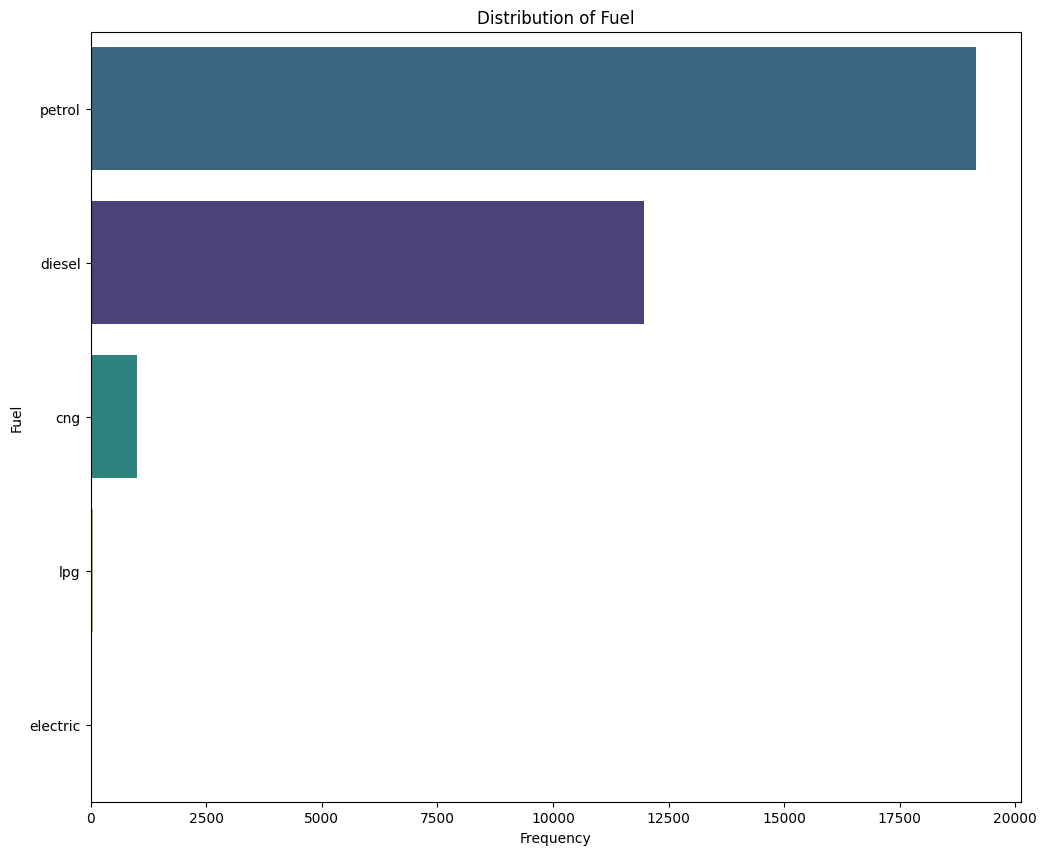

In [13]:
# Visualize categorical columns using barchart
for col in cat_columns:
    plt.figure(figsize=(12, 10))
    # Plot using countplot and show the first 20 items of each column if it extends 20 items
    sns.countplot(data=df, y=col, order=df[col].value_counts().nlargest(20).index, hue = col, palette='viridis',legend=None)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel("Frequency")
    plt.ylabel(col.capitalize())
    plt.show()


*_Numerical Variables_*

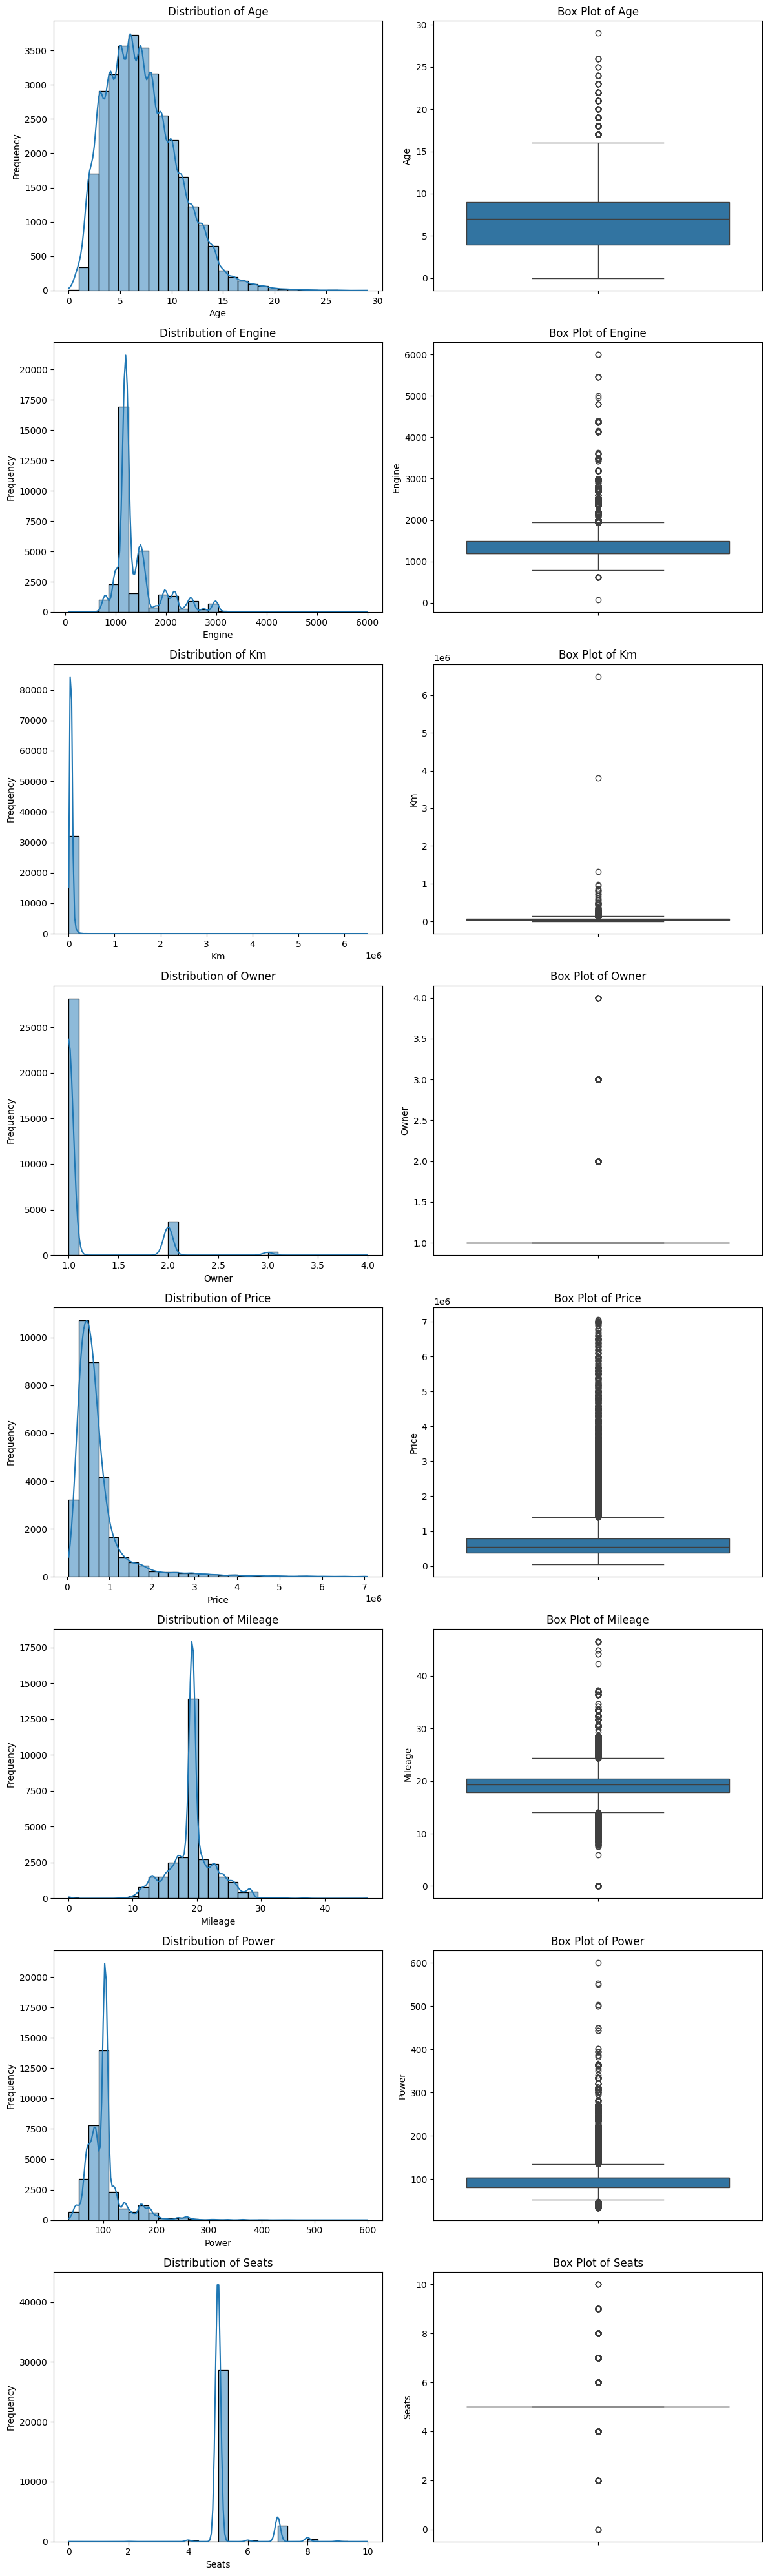

In [14]:
# Create subplots for histograms and box plots
fig, axes = plt.subplots(len(num_columns), 2, figsize=(12, 5 * len(num_columns)))

# Loop through each numerical variable
for i, var in enumerate(num_columns):
    # Histogram
    sns.histplot(data=df, x=var, bins=30, kde=True, ax=axes[i, 0])  # KDE for smooth density estimate
    axes[i, 0].set_title(f'Distribution of {var.capitalize()}')
    axes[i, 0].set_xlabel(var.capitalize())
    axes[i, 0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(data=df, y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var.capitalize()}')
    axes[i, 1].set_ylabel(var.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

#### Bivariate Analysis

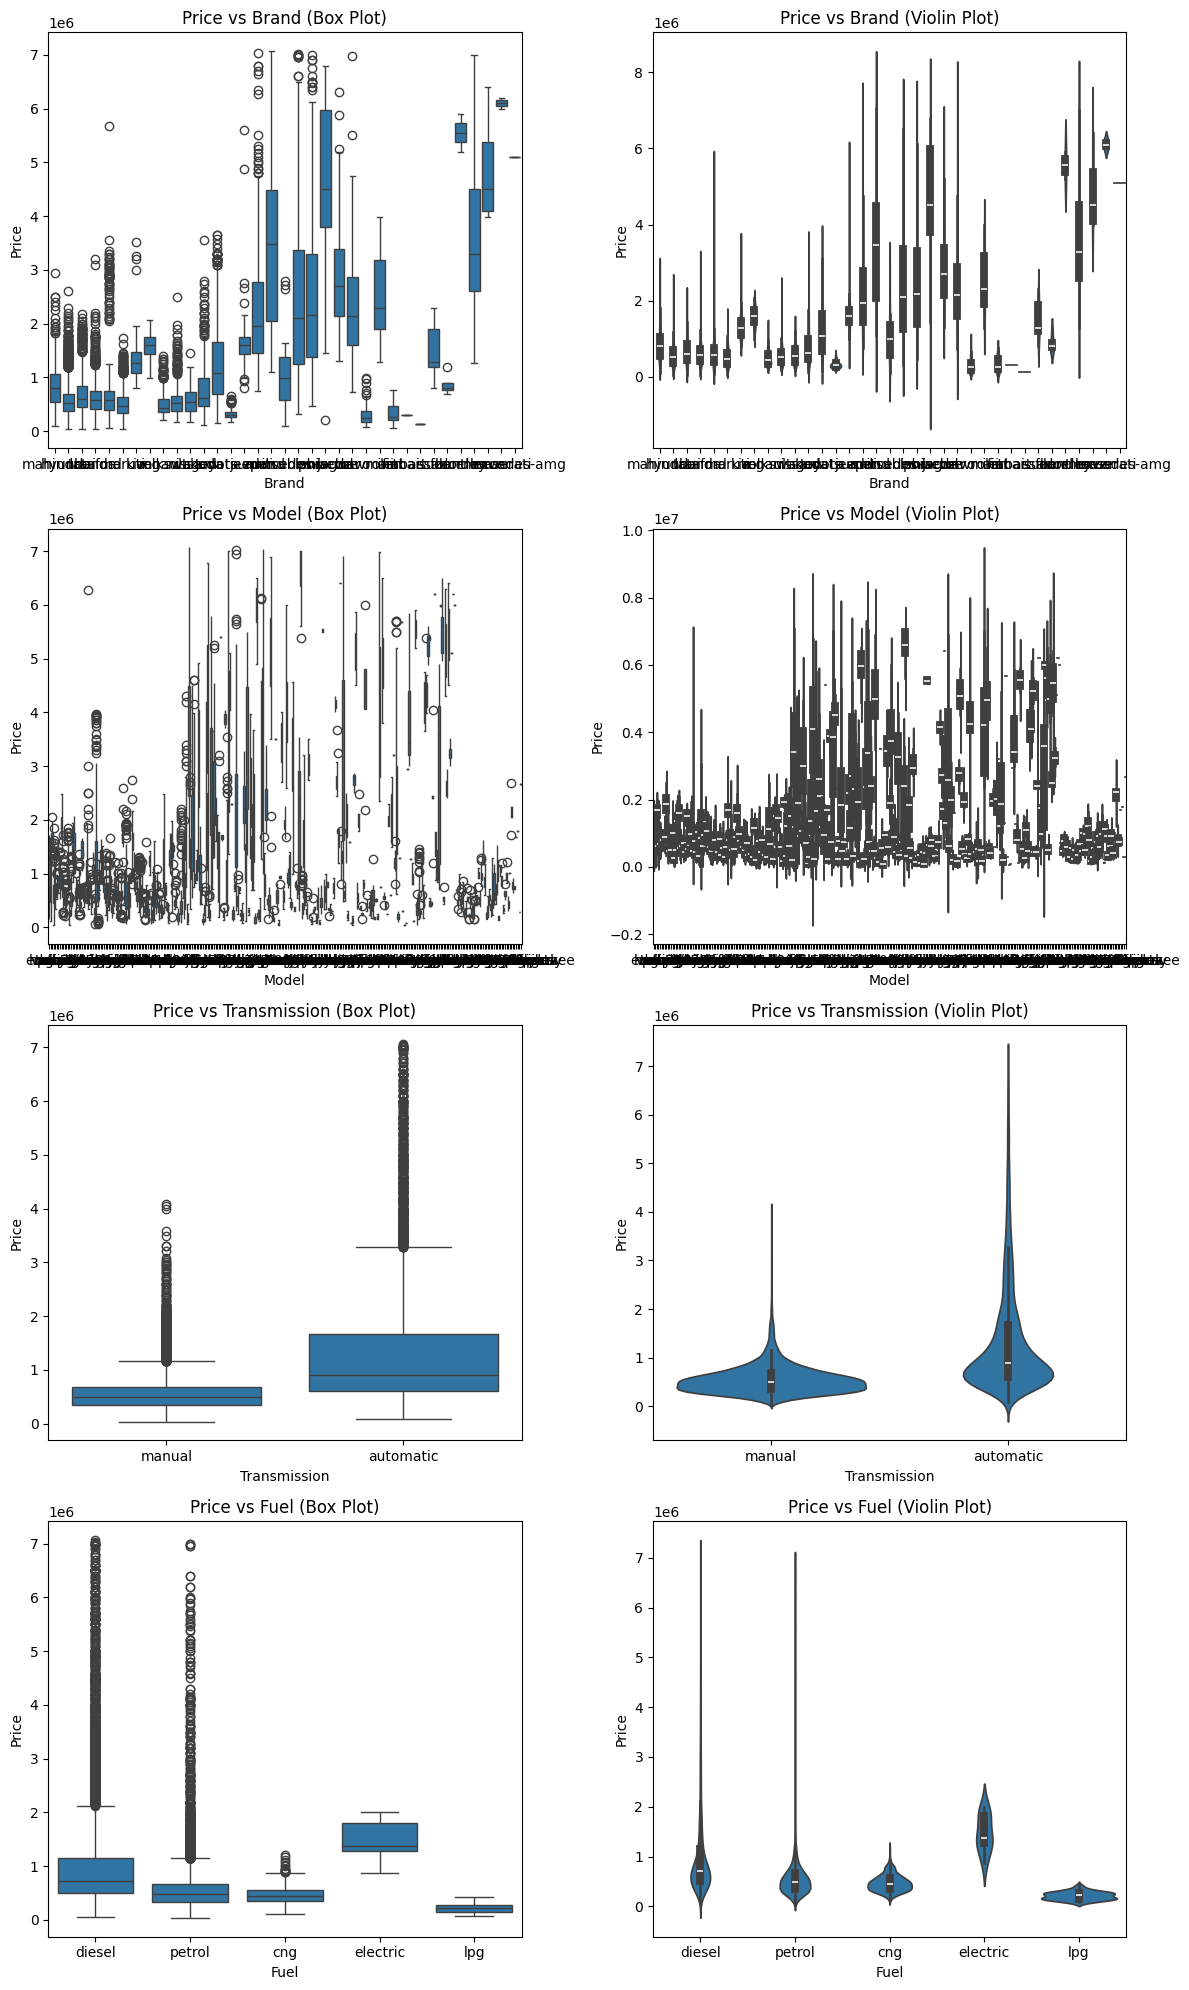

In [15]:
# List of categorical variables to analyze against Price

# Create subplots for box plots and violin plots
fig, axes = plt.subplots(len(cat_columns), 2, figsize=(12, 5 * len(cat_columns)))

# Loop through each categorical variable
for i, var in enumerate(cat_columns):
    # Box Plot
    sns.boxplot(data=df, x=var, y='price', ax=axes[i, 0])
    axes[i, 0].set_title(f'Price vs {var.capitalize()} (Box Plot)')
    axes[i, 0].set_xlabel(var.capitalize())
    axes[i, 0].set_ylabel('Price')

    # Violin Plot
    sns.violinplot(data=df, x=var, y='price', ax=axes[i, 1])
    axes[i, 1].set_title(f'Price vs {var.capitalize()} (Violin Plot)')
    axes[i, 1].set_xlabel(var.capitalize())
    axes[i, 1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

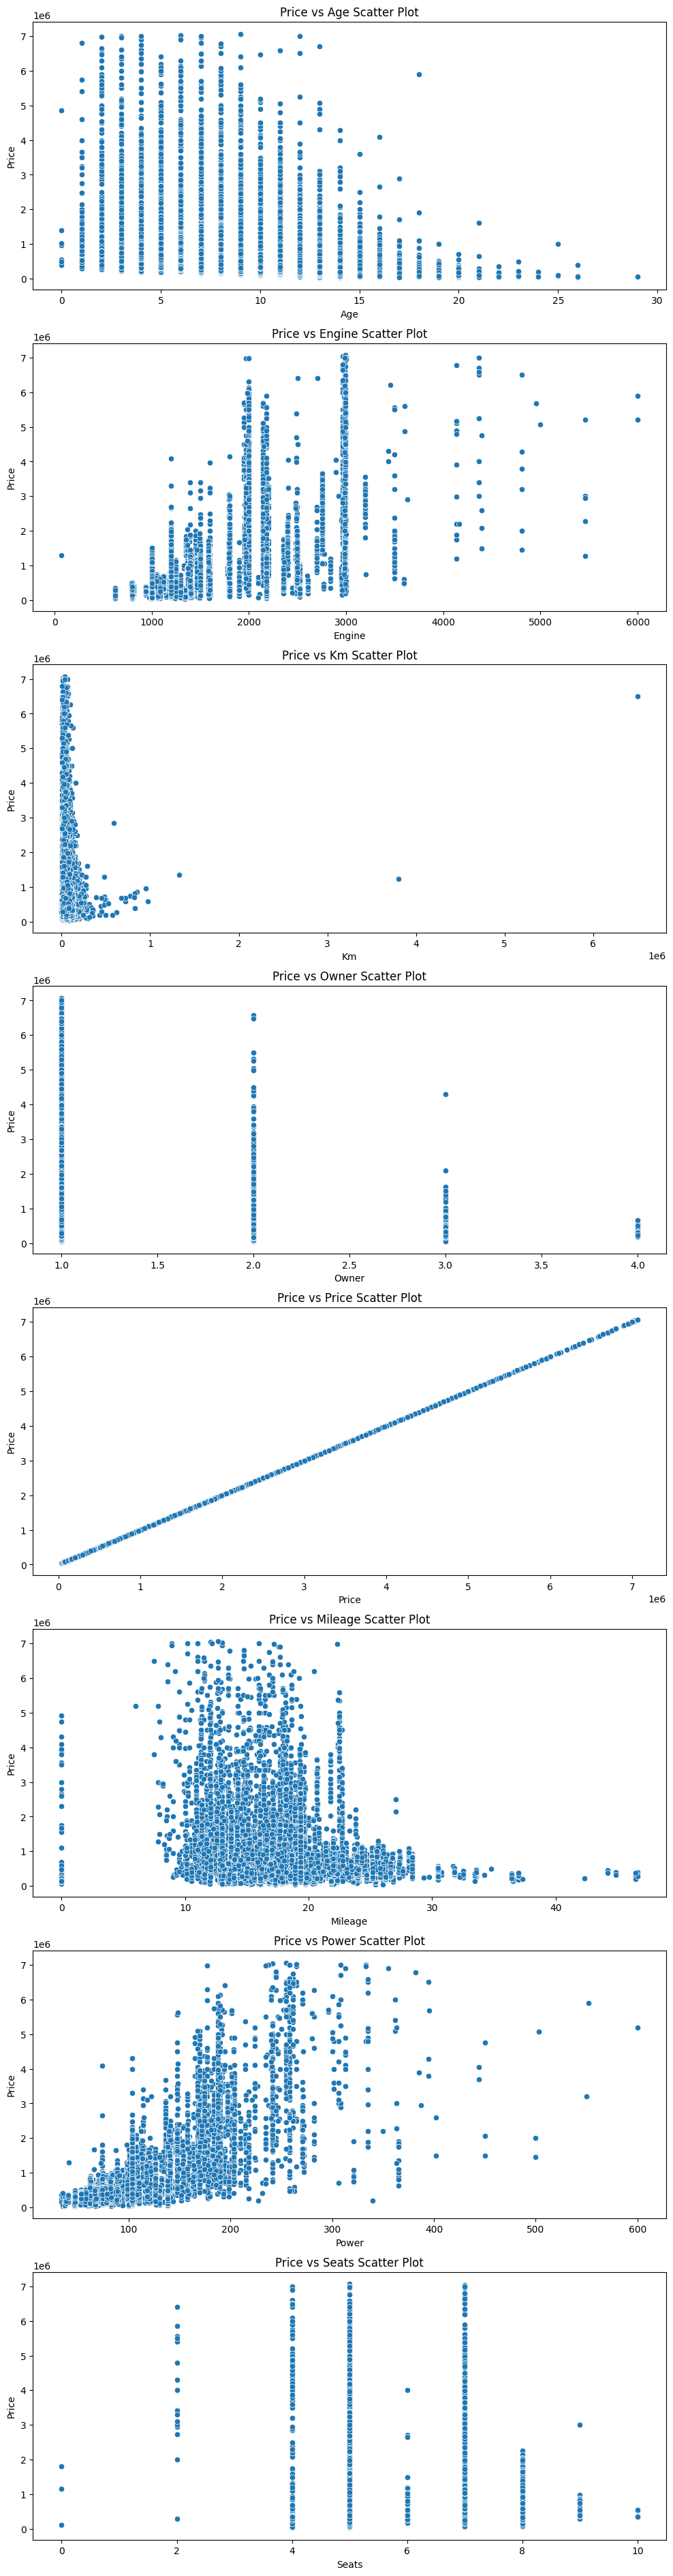

In [16]:
# List of numerical variables to analyze against Price

# Create subplots for scatter plots
fig, axes = plt.subplots(len(num_columns), 1, figsize=(12, 6 * len(num_columns)))

# Loop through each numerical variable
for i, var in enumerate(num_columns):
    sns.scatterplot(data=df, x=var, y='price', ax=axes[i])
    axes[i].set_title(f'Price vs {var.capitalize()} Scatter Plot')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Price')

# Adjust layout
# plt.tight_layout()
plt.show()


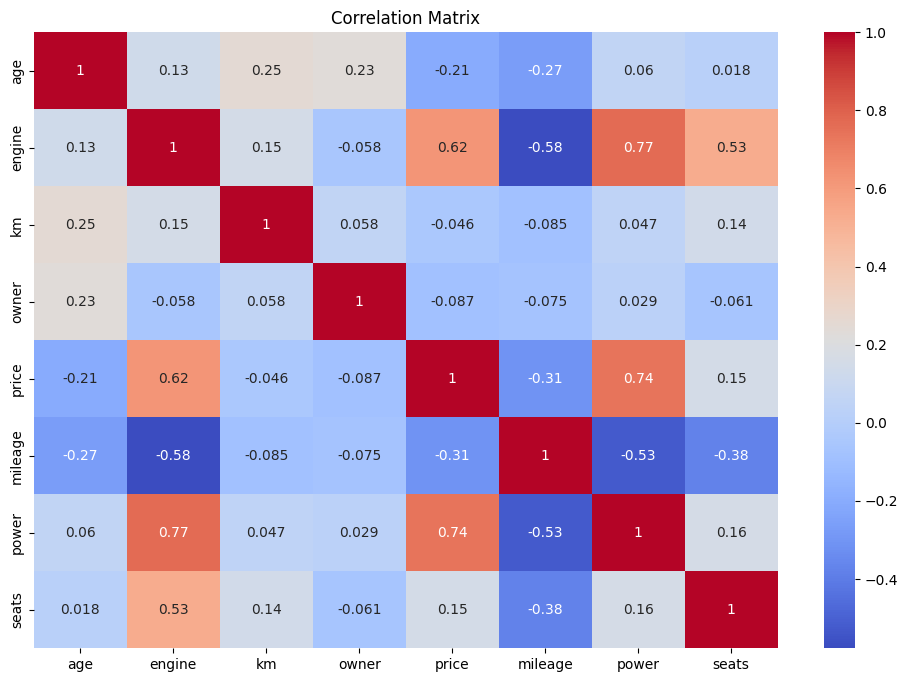

In [17]:
# Compute correlation matrix
correlation_matrix = df[num_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)
plt.title('Correlation Matrix')
plt.show()


## Feature Engineering

#### Creating Features and Encoding categorical features

In [18]:
# Binned Features
df['age_bin'] = pd.cut(df['age'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29'], right=False)
df['km_bin'] = pd.cut(df['km'], bins=[0, 1000000, 2000000, 3000000, 4000000, 5000000, 6500000], labels=['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6.5M'], right=False)

# Categorical Interaction Features
df['brand_model'] = df['brand'] + "_" + df['model']
df['fuel_transmission'] = df['fuel'] + "_" + df['transmission']

# Drop age and km columns
df = df.drop(['age','km','brand','model','fuel','transmission'], axis =1)

df.head()

,engine,owner,price,mileage,power,seats,age_bin,km_bin,brand_model,fuel_transmission
0,2184.0,1.0,1231000.0,19.305532,103.497647,5.0,0-4,0-1M,mahindra_thar,diesel_manual
1,1591.0,1.0,786000.0,19.305532,103.497647,5.0,5-9,0-1M,hyundai_verna,petrol_manual
2,1956.0,1.0,1489000.0,19.305532,103.497647,5.0,0-4,0-1M,tata_harrier,diesel_manual
3,1498.0,1.0,1227000.0,19.305532,103.497647,5.0,0-4,0-1M,honda_city,petrol_automatic
4,1498.0,1.0,887000.0,19.305532,103.497647,5.0,0-4,0-1M,ford_ecosport,diesel_manual


In [19]:
# Features
X = df.drop('price', axis = 1)
# Label
y = df['price']

In [20]:
X= X.dropna()

X.isna().sum()

engine               0
owner                0
mileage              0
power                0
seats                0
age_bin              0
km_bin               0
brand_model          0
fuel_transmission    0
dtype: int64

In [21]:
pd.set_option('display.max_columns', None)

X_encoded = pd.get_dummies(df, drop_first=True)
X_encoded.head()

,engine,owner,price,mileage,power,seats,age_bin_5-9,age_bin_10-14,age_bin_15-19,age_bin_20-24,age_bin_25-29,km_bin_1M-2M,km_bin_2M-3M,km_bin_3M-4M,km_bin_4M-5M,km_bin_5M-6.5M,brand_model_audi_a3,brand_model_audi_a4,brand_model_audi_a6,brand_model_audi_a7,brand_model_audi_a8,brand_model_audi_q3,brand_model_audi_q5,brand_model_audi_q7,brand_model_audi_rs5,brand_model_audi_tt,brand_model_bentley_continental,brand_model_bmw_1,brand_model_bmw_3,brand_model_bmw_3 series,brand_model_bmw_5,brand_model_bmw_6,brand_model_bmw_7,brand_model_bmw_x1,brand_model_bmw_x3,brand_model_bmw_x4,brand_model_bmw_x5,brand_model_bmw_x6,brand_model_bmw_z4,brand_model_chevrolet_aveo,brand_model_chevrolet_beat,brand_model_chevrolet_captiva,brand_model_chevrolet_cruze,brand_model_chevrolet_enjoy,brand_model_chevrolet_optra,brand_model_chevrolet_sail,brand_model_chevrolet_spark,brand_model_chevrolet_tavera,brand_model_datsun_go,brand_model_datsun_go plus,brand_model_datsun_redi,brand_model_datsun_redi go,brand_model_datsun_redi-go,brand_model_datsun_redigo,brand_model_fiat_avventura,brand_model_fiat_grande,brand_model_fiat_linea,brand_model_fiat_petra,brand_model_fiat_punto,brand_model_fiat_siena,brand_model_force_gurkha,brand_model_force_one,brand_model_ford_aspire,brand_model_ford_classic,brand_model_ford_ecosport,brand_model_ford_endeavour,brand_model_ford_fiesta,brand_model_ford_figo,brand_model_ford_figo aspire,brand_model_ford_freestyle,brand_model_ford_fusion,brand_model_ford_ikon,brand_model_ford_mustang,brand_model_ford_new figo,brand_model_honda_accord,brand_model_honda_amaze,brand_model_honda_br-v,brand_model_honda_brio,brand_model_honda_brv,brand_model_honda_city,brand_model_honda_civic,brand_model_honda_cr,brand_model_honda_cr-v,brand_model_honda_crv,brand_model_honda_jazz,brand_model_honda_mobilio,brand_model_honda_wr-v,brand_model_honda_wrv,brand_model_hyundai_accent,brand_model_hyundai_alcazar,brand_model_hyundai_aura,brand_model_hyundai_creta,brand_model_hyundai_elantra,brand_model_hyundai_elite,brand_model_hyundai_elite i20,brand_model_hyundai_eon,brand_model_hyundai_getz,brand_model_hyundai_grand,brand_model_hyundai_grand i10,brand_model_hyundai_grand i10 nios,brand_model_hyundai_i10,brand_model_hyundai_i20,brand_model_hyundai_i20 active,brand_model_hyundai_new,brand_model_hyundai_new elantra,brand_model_hyundai_new i20,brand_model_hyundai_new i20 n line,brand_model_hyundai_new santro,brand_model_hyundai_santa,brand_model_hyundai_santro,brand_model_hyundai_santro xing,brand_model_hyundai_sonata,brand_model_hyundai_tucson,brand_model_hyundai_tucson new,brand_model_hyundai_venue,brand_model_hyundai_verna,brand_model_hyundai_xcent,brand_model_isuzu_d-max,brand_model_isuzu_mux,brand_model_jaguar_f-pace,brand_model_jaguar_xe,brand_model_jaguar_xf,brand_model_jaguar_xj,brand_model_jeep_compass,brand_model_jeep_grand cherokee,brand_model_jeep_wrangler,brand_model_kia_carens,brand_model_kia_carnival,brand_model_kia_seltos,brand_model_kia_sonet,brand_model_land rover_rover,brand_model_land_rover,brand_model_lexus_es,brand_model_lexus_nx,brand_model_lexus_rx,brand_model_mahindra_alturas,brand_model_mahindra_bolero,brand_model_mahindra_bolero neo,brand_model_mahindra_e,brand_model_mahindra_jeep,brand_model_mahindra_kuv,brand_model_mahindra_kuv 100 nxt,brand_model_mahindra_kuv100,brand_model_mahindra_logan,brand_model_mahindra_marazzo,brand_model_mahindra_nuvosport,brand_model_mahindra_quanto,brand_model_mahindra_renault,brand_model_mahindra_scorpio,brand_model_mahindra_ssangyong,brand_model_mahindra_thar,brand_model_mahindra_tuv,brand_model_mahindra_tuv 300 plus,brand_model_mahindra_tuv300,brand_model_mahindra_verito,brand_model_mahindra_xuv 3oo,brand_model_mahindra_xuv300,brand_model_mahindra_xuv500,brand_model_mahindra_xuv700,brand_model_mahindra_xylo,brand_model_maruti_1000,brand_model_maruti_800,brand_model_maruti_a,brand_model_maruti_a star,brand_model_maruti_a-star,brand_model_maruti_alto,brand_model_maruti_alto 800,brand_model_maruti_alto k10

#### MinMax Scaling for Numerical Features

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMax scaling
X_scaled = scaler.fit_transform(X_encoded)

#### Feature Selection

In [23]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# Apply PCA to retain 95% of the variance

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply PCA on the training data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Transform the test set with the same PCA
X_test_pca = pca.transform(X_test)


# Check how many components were retained
print(f"Number of components retained: {pca.n_components_}")

# Optionally, print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio of each component: {explained_variance}")
print(f"Total Explained Variance: {explained_variance.sum() * 100:.2f}%")

Number of components retained: 93
Explained Variance Ratio of each component: [0.17463261 0.14716945 0.08441559 0.05382186 0.04367739 0.0253493
 0.02070487 0.01892619 0.01778804 0.01597765 0.01568819 0.01419956
 0.01270864 0.01228287 0.01151901 0.01107426 0.01083201 0.01041165
 0.01006749 0.00990885 0.009864   0.00967261 0.00910922 0.00877608
 0.00828934 0.00755392 0.00716493 0.00647531 0.00632805 0.00595099
 0.00552277 0.00550657 0.00539672 0.00526382 0.00519536 0.00493742
 0.00474877 0.00469334 0.00445501 0.00400942 0.00375349 0.00357979
 0.00348601 0.00342359 0.00337919 0.00334863 0.00321034 0.00308394
 0.0029558  0.0028816  0.00276719 0.0025938  0.00256248 0.0025428
 0.00249198 0.00236549 0.00228602 0.00212513 0.00203745 0.00194085
 0.00190893 0.00183259 0.00182194 0.00177776 0.00170996 0.00166669
 0.00164456 0.00156618 0.00155561 0.00150687 0.00145542 0.00143677
 0.00139621 0.00134768 0.00132257 0.00130154 0.00129111 0.00126713
 0.0012469  0.00123358 0.0011656  0.00115737 0.001111

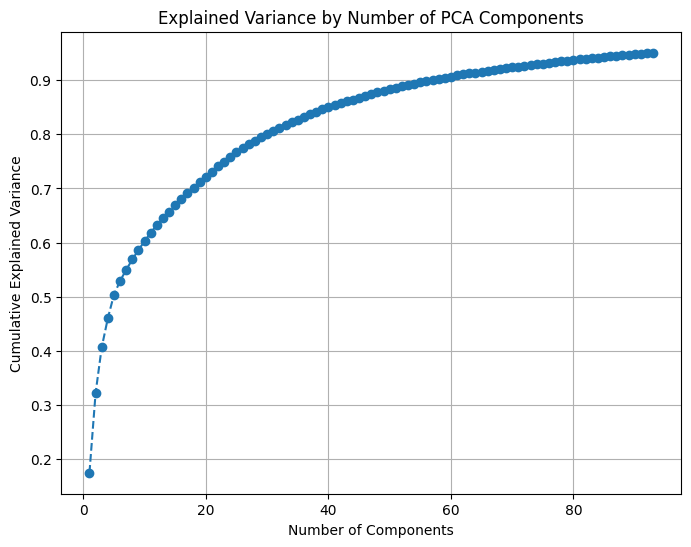

In [24]:
# Cumulative variance explained by components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

## Model Selection

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


#### Linear Models (Linear Regression, Ridge, Lasso)


In [26]:
# Linear Regression

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_pca)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R^2: {r2}')


Linear Regression MSE: 17794977000.132862
Linear Regression R^2: 0.9646840619029206


In [27]:
# Ridge and Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_pca, y_train)
y_pred_ridge = ridge.predict(X_test_pca)
print(f'Ridge Regression R^2: {r2_score(y_test, y_pred_ridge)}')
print(f'Ridge Regression MSE: {mean_squared_error(y_test, y_pred_ridge)}')

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_pca, y_train)
y_pred_lasso = lasso.predict(X_test_pca)
print(f'Lasso Regression R^2: {r2_score(y_test, y_pred_lasso)}')
print(f'Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso)}')

Ridge Regression R^2: 0.9646130667303906
Ridge Regression MSE: 17830750011.70681
Lasso Regression R^2: 0.9646840522159501
Lasso Regression MSE: 17794981881.19866


#### Tree-based models (Random Forest, Gradient Boosting, XGBoost)

In [28]:
# Random Forest Regressor
# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test_pca)
print(f'Random Forest R^2: {r2_score(y_test, y_pred_rf)}')
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}')

Random Forest R^2: 0.99224088281384
Random Forest MSE: 3909660037.615431


In [29]:
# Gradient Boosting Regressor

# Initialize and train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_pca, y_train)

# Predictions and Evaluation
y_pred_gbr = gbr.predict(X_test_pca)
print(f'Gradient Boosting R^2: {r2_score(y_test, y_pred_gbr)}')
print(f'Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gbr)}')

Gradient Boosting R^2: 0.9745974599331897
Gradient Boosting MSE: 12799819021.97368


In [30]:
# XGBoost Regressor

# Initialize and train the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_pca, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb.predict(X_test_pca)
print(f'XGBoost R^2: {r2_score(y_test, y_pred_xgb)}')
print(f'XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}')

XGBoost R^2: 0.9914421229745163
XGBoost MSE: 4312138740.8661585


#### Support Vector Regressor and KNN

In [31]:
# K-Nearest Neighbors (KNN) Regressor
# Initialize and train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Predictions and Evaluation
y_pred_knn = knn.predict(X_test_pca)
print(f'KNN R^2: {r2_score(y_test, y_pred_knn)}')
print(f'KNN MSE: {mean_squared_error(y_test, y_pred_knn)}')

KNN R^2: 0.9667283074993238
KNN MSE: 16764923564.468168


In [34]:
# Support Vector Regressor (SVR)

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train_pca, y_train)

# Predictions and Evaluation
y_pred_svr = svr.predict(X_test_pca)
print(f'SVR R^2: {r2_score(y_test, y_pred_svr)}')
print(f'SVR MSE: {mean_squared_error(y_test, y_pred_svr)}')

SVR R^2: -0.06866397485347053
SVR MSE: 538477862349.65533


**Conclusion**

The best predicting models in this case are **Random Forest** and **XGBoost**. Both provide very high ***R² values (99.22% and 99.14%, respectively) and the lowest MSEs***. If you're looking for the most accurate predictions, **Random Forest** seems to be the top choice, with **XGBoost** close behind.

If you're looking for a balance between interpretability and performance, **Gradient Boosting** is a good option, but it's not as powerful as **Random Forest or XGBoost** in this scenario. 

Models like **KNN, Lasso, and Ridge** perform decently but aren't as effective as the non-linear methods. 

**SVR** should be avoided in this case due to its very poor performance.

## Model Saving for Deployment

In [35]:
# Import pickle to save the trained model
import pickle

# Use pickle.dump() to save the model into a file.
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)